In [12]:
import os, glob, climlab
print("Kernel climlab:", climlab.__version__)
print("cwd:", os.getcwd())              # Dossier courant du notebook
print("template.py existe:", os.path.exists("template.py"))
print("npy présents:", glob.glob("npy/*.npy"))
print("figures présentes:", glob.glob("figures/*.png"))

Kernel climlab: 0.8.2
cwd: C:\Users\PC\Downloads\Experience_3
template.py existe: True
npy présents: ['npy\\ncep_lev.npy', 'npy\\ncep_T.npy']
figures présentes: ['figures\\fig0_alpha.png', 'figures\\fig0_epsa.png', 'figures\\fig1.png', 'figures\\fig1_control_T.png', 'figures\\fig2.png', 'figures\\fig2_control_q.png', 'figures\\fig3.png', 'figures\\fig3b_Ts_vs_CO2.png', 'figures\\fig3b_Ts_vs_CO2_fixed.png', 'figures\\fig3_a.png', 'figures\\fig3_b.png', 'figures\\fig3_c.png', 'figures\\fig3_gases_profiles.png', 'figures\\fig3_gases_profiles_fixed.png', 'figures\\fig4.png', 'figures\\fig4b_alpha_compense_2xCO2.png', 'figures\\fig4b_Ts_vs_alpha_fixed.png', 'figures\\fig4c_alpha_compense_2xCO2.png', 'figures\\fig4_albedo_profiles.png', 'figures\\fig5.png', 'figures\\fig5b_convection_rmse.png', 'figures\\fig5_convection_profiles.png', 'figures\\fig_bonus_CO2_CH4_alpha.png', 'figures\\fig_bonus_CO2_scenarios.png', 'figures\\fig_bonus_CO2_scenarios_1.png', 'figures\\fig_bonus_CO2_scenarios_2.p

In [13]:
import os, matplotlib.pyplot as plt
os.chdir(r"C:\Users\PC\Downloads\Experience_3")  # force le même chemin
plt.close('all')                                  # ferme toute figure ouverte
%run template.py



 
 ********************************************
Control simulation 
********************************************
AttrDict({'Ts': Field([288.]), 'Tatm': Field([288., 288., 288., 288., 288., 288., 288., 288., 288., 288., 288.,
       288., 288., 288., 288., 288., 288., 288., 288., 288., 288., 288.,
       288., 288., 288., 288., 288., 288., 288., 288.])})
output figure:  ./figures/fig1.png
output figure:  ./figures/fig2.png
diagnostics:  {'OLR': Field([243.1363796]), 'OLRclr': Field([243.1363796]), 'OLRcld': Field([0.]), 'TdotLW': Field([-3.56209571, -0.75844777, -0.35741892, -0.26819342, -0.21639742,
       -0.18621983, -0.16427303, -0.14924665, -0.13994072, -0.13455319,
       -0.13125081, -0.1286825 , -0.12691451, -0.12510342, -0.12430928,
       -0.13075466, -0.13793417, -0.1457421 , -0.15508095, -0.16576379,
       -0.1775802 , -0.19241839, -0.21198472, -0.23771766, -0.27268611,
       -0.32247573, -0.39864447, -0.52564361, -0.76037454, -1.38073196]), 'TdotLW_clr': Field([-3.562095

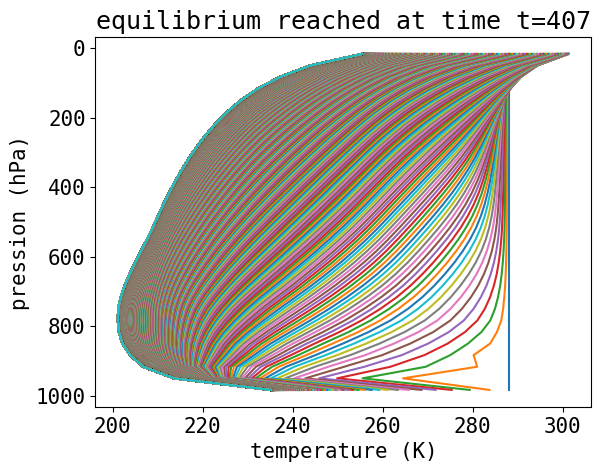

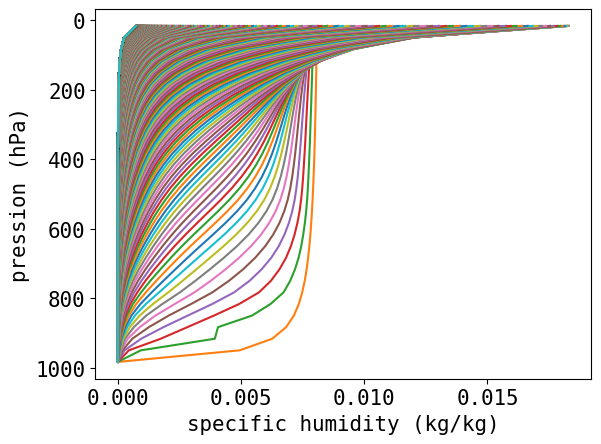

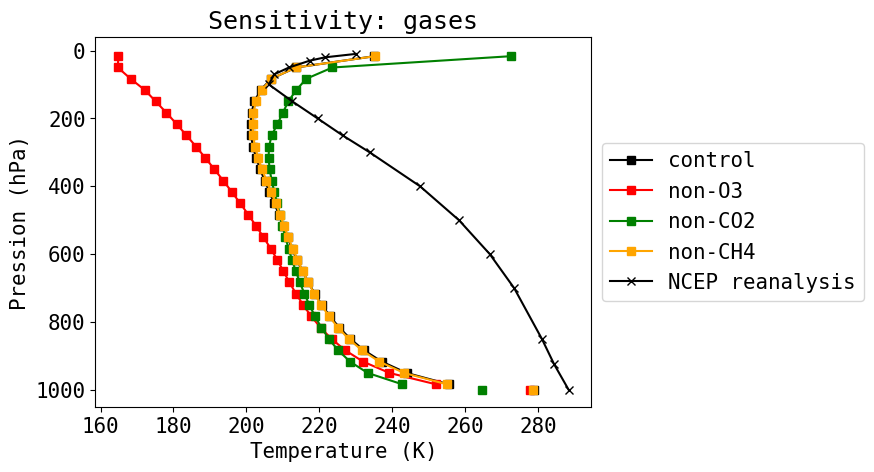

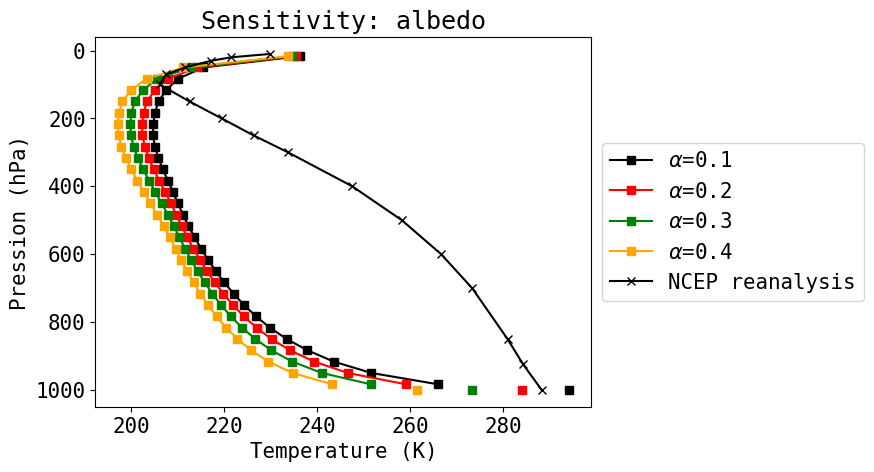

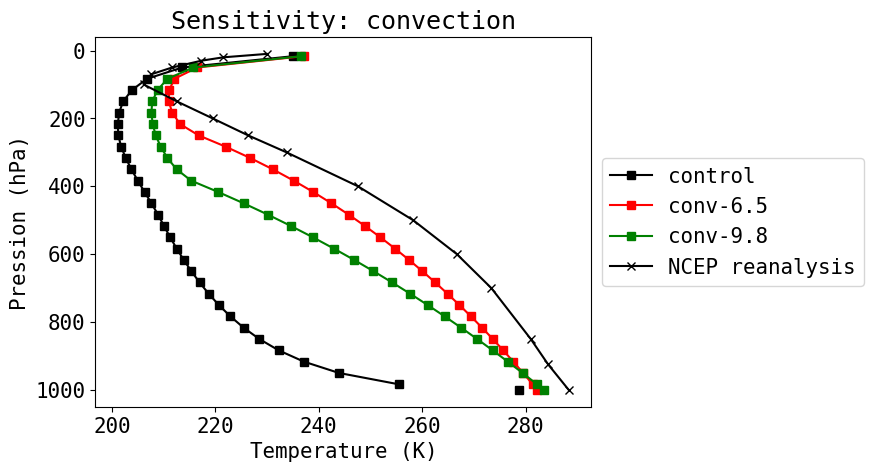

In [14]:
from IPython.display import Image, display
for i in range(1,6):
    display(Image(filename=f"figures/fig{i}.png"))

In [15]:
# Modèle 0-D (1 couche) : fonction et sensibilités
import numpy as np

SIG = 5.670374419e-8  # constante de Stefan–Boltzmann (W m^-2 K^-4)

def box1layer_T(S0=1365.0, R=0.25, alpha=0.30, eps_a=0.77, eps_s=1.0):
   
    # Modèle planétaire 0-D (une couche IR) :
    # retourne (Ts, Ta) en Kelvin pour S0, R, alpha, eps_a, eps_s.
    
    # éviter divisions pathologiques
    denom = eps_s * (1.0 - 0.5*eps_a)
    if denom <= 0:
        raise ValueError("Choix (eps_a, eps_s) invalide : 1 - 0.5*eps_a doit être > 0.")

    Ts4 = ((1.0 - alpha) * S0 * R) / (SIG * denom)
    Ts  = Ts4**0.25
    Ta  = ((0.5 * eps_s) ** 0.25) * Ts
    return Ts, Ta

#vérification rapide (valeurs “cours” typiques)
Ts, Ta = box1layer_T(S0=1365, R=0.25, alpha=0.30, eps_a=0.77, eps_s=1.0)
print(f"Test: Ts={Ts:.2f} K, Ta={Ta:.2f} K")

#dossier de sortie (mêmes conventions que ton script)
os.makedirs("figures", exist_ok=True)

# Sensibilité à l'albédo
alphas = np.linspace(0.10, 0.45, 15)
Ts_alpha, Ta_alpha = [], []
for a in alphas:
    Ts_, Ta_ = box1layer_T(alpha=a, eps_a=0.77, eps_s=1.0)
    Ts_alpha.append(Ts_); Ta_alpha.append(Ta_)

plt.figure()
plt.plot(alphas, Ts_alpha, 'o-', label=r'$T_s$')
plt.plot(alphas, Ta_alpha, 's--', label=r'$T_a$')
plt.xlabel(r'Albédo $\alpha$')
plt.ylabel('Température (K)')
plt.title('Modèle 0-D : sensibilité à $\u03B1$')
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig("figures/fig0_alpha.png", dpi=150)
plt.close()

# Sensibilité à l\'émissivité atmosphérique eps_a
epsas = np.linspace(0.0, 1.0, 21)
Ts_epsa, Ta_epsa = [], []
for ea in epsas:
    Ts_, Ta_ = box1layer_T(alpha=0.30, eps_a=ea, eps_s=1.0)
    Ts_epsa.append(Ts_); Ta_epsa.append(Ta_)

plt.figure()
plt.plot(epsas, Ts_epsa, 'o-', label=r'$T_s$')
plt.plot(epsas, Ta_epsa, 's--', label=r'$T_a$')
plt.xlabel(r'Émissivité atmosphérique $\varepsilon_a$')
plt.ylabel('Température (K)')
plt.title('Modèle 0-D : sensibilité à $\u03B5_a$')
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig("figures/fig0_epsa.png", dpi=150)
plt.close()

print("Figures 0-D écrites :", "figures/fig0_alpha.png", "et", "figures/fig0_epsa.png")


Test: Ts=287.69 K, Ta=241.92 K
Figures 0-D écrites : figures/fig0_alpha.png et figures/fig0_epsa.png


In [16]:
def force_set_gases(process, mapping):
    
    # Répète un nombre indéfinie de fois absorber_vmr aux sous-processus.
    if hasattr(process, 'absorber_vmr'):
        for k, v in mapping.items():
            process.absorber_vmr[k] = float(v)
    if hasattr(process, 'subprocess'):
        for sub in process.subprocess.values():
            force_set_gases(sub, mapping)

print('\n','\n','********************************************')
print('Sensitivity to the concentration of gases in the atmosphere')
print('********************************************')

# Courbe contrôle (mêmes objets "rcm/rad" que ci-dessus)
plt.plot(rcm.Tatm[::-1], rcm.lev[::-1], marker='s', color='k', label='control')
plt.plot(rcm.Ts, 1000, marker='s', color='k')

# On peut tester differentes valeurs
cases = [
    ("PI-CO2", {"CO2": 280e-6}),             # préindustriel
    ("PA-CO2", {"CO2": 420e-6}),             # ~aujourd’hui
]

colors = ['r','g','orange','tab:blue','tab:pink','tab:purple','tab:brown','tab:olive','tab:cyan']

for (label, vmr_change), col in zip(cases, colors):
    # (re)bâtir un modèle frais pour chaque expérience
    state = climlab.column_state(num_lev=30)
    h2o = climlab.radiation.ManabeWaterVapor(name='WaterVapor', state=state)
    rad = climlab.radiation.RRTMG(name='Radiation', state=state, specific_humidity=h2o.q, albedo=alb)
    exp = climlab.couple([rad, h2o], name=f'RCM_{label}')

    # appliquer les VMR partout
    force_set_gases(exp, vmr_change)

    # départ isotherme puis intégration
    exp.state.Tatm[:] = exp.state.Ts
    exp.integrate_years(2)

    # tracer
    plt.plot(exp.Tatm[::-1], exp.lev[::-1], marker='s', color=col, label=label)
    plt.plot(exp.Ts, 1000, marker='s', color=col)

# profil NCEP pour repère
plt.plot(ncep_T, ncep_lev, marker='x', color='k', label='NCEP reanalysis')

plt.gca().invert_yaxis()
plt.title('Sensitivity: gases')
plt.ylabel('Pression (hPa)')
plt.xlabel('Temperature (K)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_name = outpath+'fig3_a.png'
print('output figure: ', fig_name)
plt.savefig(fig_name, bbox_inches='tight'); plt.close()


 
 ********************************************
Sensitivity to the concentration of gases in the atmosphere
********************************************
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
output figure:  ./figures/fig3_a.png


In [17]:
# Courbe contrôle (mêmes objets "rcm/rad" que ci-dessus)
plt.plot(rcm.Tatm[::-1], rcm.lev[::-1], marker='s', color='k', label='control')
plt.plot(rcm.Ts, 1000, marker='s', color='k')
cases = [
    ("PI-CO2", {"CO2": 280e-6}),             # préindustriel
    ("PA-CO2", {"CO2": 420e-6}),             # ~aujourd’hui
    ("2xCO2",  {"CO2": 2*280e-6}), # 2* 280e-6 (≈ 280 ppm) 2 fois le niveau de concentration de CO2 préindustriel
    ("2xCH4",  {"CH4": 2*0.7e-6}), # 2*0.7e-6 (≈ 700 ppb) 2 fois le niveau de concentration de CH4 préindustriel
    ("CO2+CH4x2", {"CO2": 2*280e-6, "CH4": 2*0.7e-6}),
]

colors = ['r','g','orange','tab:blue','tab:pink','tab:purple','tab:brown','tab:olive','tab:cyan']

for (label, vmr_change), col in zip(cases, colors):
    
    state = climlab.column_state(num_lev=30)
    h2o = climlab.radiation.ManabeWaterVapor(name='WaterVapor', state=state)
    rad = climlab.radiation.RRTMG(name='Radiation', state=state, specific_humidity=h2o.q, albedo=alb)
    exp = climlab.couple([rad, h2o], name=f'RCM_{label}')

    # appliquer les VMR partout
    force_set_gases(exp, vmr_change)

    # départ isotherme puis intégration
    exp.state.Tatm[:] = exp.state.Ts
    exp.integrate_years(2)

    # tracer
    plt.plot(exp.Tatm[::-1], exp.lev[::-1], marker='s', color=col, label=label)
    plt.plot(exp.Ts, 1000, marker='s', color=col)

# profil NCEP pour repère
plt.plot(ncep_T, ncep_lev, marker='x', color='k', label='NCEP reanalysis')

plt.gca().invert_yaxis()
plt.title('Sensitivity: gases')
plt.ylabel('Pression (hPa)')
plt.xlabel('Temperature (K)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_name = outpath+'fig3_b.png'
print('output figure: ', fig_name)
plt.savefig(fig_name, bbox_inches='tight'); plt.close()

Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
output figure:  ./figures/fig3_b.png


In [18]:
# Courbe contrôle (mêmes objets "rcm/rad" que ci-dessus)
plt.plot(rcm.Tatm[::-1], rcm.lev[::-1], marker='s', color='k', label='control')
plt.plot(rcm.Ts, 1000, marker='s', color='k')
cases = [
    ("PI-CO2", {"CO2": 280e-6}),             # préindustriel
    ("PA-CO2", {"CO2": 420e-6}),             # ~aujourd’hui
    ("4xCO2",  {"CO2": 4*280e-6}), # 4* 280e-6 (≈ 280 ppm) 4 fois le niveau de concentration de CO2 préindustriel
    ("4xCH4",  {"CH4": 4*0.7e-6}), # 4*0.7e-6 (≈ 700 ppb) 4 fois le niveau de concentration de CH4 préindustriel
    ("CO2+CH4x4", {"CO2": 4*280e-6, "CH4": 4*0.7e-6}), # 4 fois le niveau de concentration de CH4 et de CO2 préindustriel
]

colors = ['r','g','orange','tab:blue','tab:pink','tab:purple','tab:brown','tab:olive','tab:cyan']

for (label, vmr_change), col in zip(cases, colors):
    # (re)bâtir un modèle frais pour chaque expérience
    state = climlab.column_state(num_lev=30)
    h2o = climlab.radiation.ManabeWaterVapor(name='WaterVapor', state=state)
    rad = climlab.radiation.RRTMG(name='Radiation', state=state, specific_humidity=h2o.q, albedo=alb)
    exp = climlab.couple([rad, h2o], name=f'RCM_{label}')

    # appliquer les VMR partout
    force_set_gases(exp, vmr_change)

    # départ isotherme puis intégration
    exp.state.Tatm[:] = exp.state.Ts
    exp.integrate_years(2)

    # tracer
    plt.plot(exp.Tatm[::-1], exp.lev[::-1], marker='s', color=col, label=label)
    plt.plot(exp.Ts, 1000, marker='s', color=col)

# profil NCEP pour repère
plt.plot(ncep_T, ncep_lev, marker='x', color='k', label='NCEP reanalysis')

plt.gca().invert_yaxis()
plt.title('Sensitivity: gases')
plt.ylabel('Pression (hPa)')
plt.xlabel('Temperature (K)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig_name = outpath+'fig3_c.png'
print('output figure: ', fig_name)
plt.savefig(fig_name, bbox_inches='tight'); plt.close()

Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
output figure:  ./figures/fig3_c.png


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

alb = 0.25   # albédo de référence pour toutes les expériences
outpath = "./figures/"   # dossier de sortie pour les figures

#  une petite aide pour convertir les tableaux climlab en numpy 
def _np(x):
    """
    Retourne un array numpy à partir d’un objet climlab / xarray.
    Si x possède un attribut .data (xarray), on le récupère,
    sinon on prend x directement.
    """
    a = getattr(x, "data", x)
    return np.array(a, dtype=float)

def force_set_gases(process, mapping):
    """
    Applique une nouvelle concentration pour certains gaz
    dans tous les sous-processus radiatifs.

    mapping ex: {'CO2': 560e-6}
    → on impose absorber_vmr['CO2'] = 560e-6 partout.
    """
    # Si le process a un dict absorber_vmr, on met à jour les valeurs
    if hasattr(process, 'absorber_vmr'):
        for k, v in mapping.items():
            process.absorber_vmr[k] = float(v)
    # Si le process possède des sous-processus, on se propage récursivement
    if hasattr(process, 'subprocess'):
        for sub in process.subprocess.values():
            force_set_gases(sub, mapping)

def Ts_implicite(model):
    """
    Calcule la température de surface implicite Ts qui équilibre
    le bilan radiatif à la surface, sans modifier la physique du modèle.

    On impose LW_up_surface tel que :
        LW_up_needed = LW_down + SW_down - SW_up
      puis on en déduit Ts via la loi de Stefan-Boltzmann.
    """
    model.compute_diagnostics()                # met à jour tous les flux radiatifs
    SWdn = _np(model.SW_flux_down)[-1]         # flux solaire descendant à la surface
    SWup = _np(model.SW_flux_up)[-1]           # flux solaire réfléchi à la surface
    LWdn = _np(model.LW_flux_down)[-1]         # flux IR descendant à la surface
    LWup_needed = LWdn + SWdn - SWup           # flux IR sortant requis pour bilan net nul
    return float((LWup_needed / const.sigma) ** 0.25)  # Ts équivalente (K)

print('\n','\n','********************************************')
print('Sensitivity to the concentration of gases in the atmosphere')
print('********************************************')


# 1) Cas à tester : préindustriel vs doublement de CO2

cases = [
    ("PI-CO2", {"CO2": 280e-6}),        # PI : 280 ppm
    ("2xCO2",  {"CO2": 2 * 280e-6})    # doublement : 560 ppm
]
Ts_list = []   # on stockera (label, Ts_implicite) pour chaque cas

for label, vmr_change in cases:
    # Création d’un état colonne standard
    state = climlab.column_state(num_lev=30)

    # Schéma de vapeur d’eau de Manabe
    h2o = climlab.radiation.ManabeWaterVapor(name='WaterVapor', state=state)

    # Schéma radiatif RRTMG forcé par la vapeur d’eau et l’albédo alb
    rad2 = climlab.radiation.RRTMG(name='Radiation', state=state,
                                   specific_humidity=h2o.q, albedo=alb)

    # Couplage des processus radiatifs + vapeur d’eau
    exp = climlab.couple([rad2, h2o], name=f'RCM_{label}')

    # Imposer les nouvelles concentrations de gaz (ici CO2)
    force_set_gases(exp, vmr_change)

    # Condition initiale : colonne isotherme (Tatm = Ts)
    exp.state.Tatm[:] = exp.state.Ts
    # Intégration vers l’équilibre radiatif
    exp.integrate_years(2)

    # Calcul de la Ts implicite associée à ce cas
    Ts_i = Ts_implicite(exp)
    Ts_list.append((label, Ts_i))


# 2) Courbe Ts implicite vs facteur CO2 (type fig3b du TP)

def factor_from_label(lbl):
    """
    Déduit un facteur de CO2 à partir du label.
    PI-CO2 → 1.0, 2xCO2 → 2.0, etc.
    """
    return 2.0 if lbl.startswith('2x') else 1.0

# Axe des x : facteur (1 ou 2) ; axe des y : Ts implicite
factors = [factor_from_label(lbl) for lbl, _ in Ts_list]
Ts_vals = [ts for _, ts in Ts_list]

plt.figure(figsize=(5.8, 4.6), dpi=120)
plt.plot(factors, Ts_vals, '-o')
plt.xticks(sorted(set(factors)))
plt.xlabel('Facteur CO$_2$')
plt.ylabel('Ts implicite (K)')
plt.title('Ts en fonction du facteur CO$_2$')
fig_name = outpath + 'fig3b_Ts_vs_CO2_fixed.png'
print('output figure:', fig_name)

print("\nRésumé des températures obtenues :")
for lbl, Ts_val in Ts_list:
    print(f"  {lbl:8s} → Ts = {Ts_val:.2f} K")

plt.savefig(fig_name, bbox_inches='tight')
plt.close()


# 3) Calcul de l’albédo compensatoire (géo-ingénierie)

# Ts de référence : cas PI-CO2 (cible à retrouver)
Ts_PI = dict(Ts_list)['PI-CO2']
alpha0 = alb        # albédo de départ (PI)
co2_2x = 2 * 280e-6 # VMR de CO2 pour 2×CO2

def Ts_imp_alpha(alpha, co2):
    """
    Retourne Ts implicite pour un couple (albédo, CO2) donné.
    On reconstruit un modèle colonne pour chaque combinaison.
    """
    state = climlab.column_state(num_lev=30)
    h2o   = climlab.radiation.ManabeWaterVapor(name='WaterVapor', state=state)
    rad2  = climlab.radiation.RRTMG(name='Radiation', state=state,
                                    specific_humidity=h2o.q,
                                    albedo=float(alpha))
    mod   = climlab.couple([rad2, h2o], name='RCM_find_alpha')

    # impose la VMR de CO2 souhaitée
    force_set_gases(mod, {'CO2': float(co2)})

    # intégration vers l’équilibre
    mod.state.Tatm[:] = mod.state.Ts
    mod.integrate_years(2)
    return Ts_implicite(mod)

# Balayage d’une grille d’albédo entre 0.05 et 0.50
alph_grid = np.linspace(0.05, 0.50, 19)
Ts_grid = np.array([Ts_imp_alpha(a, co2_2x) for a in alph_grid])

# On cherche l’albédo α* pour lequel Ts(2×CO2, α*) ≈ Ts_PI
diff = Ts_grid - Ts_PI
# Indices où le signe de la différence change → Ts_PI est entre deux points
cross = np.where(np.sign(diff[:-1]) * np.sign(diff[1:]) <= 0)[0]

if len(cross) == 0:
    # Pas d’encadrement : on prend l’alpha avec |Ts - Ts_PI| minimal
    i = int(np.argmin(np.abs(diff)))
    alpha_star, Ts_star = alph_grid[i], Ts_grid[i]
else:
    # On interpole linéairement en α entre les deux points qui encadrent Ts_PI
    i = int(cross[0])
    a0, a1, T0, T1 = alph_grid[i], alph_grid[i+1], Ts_grid[i], Ts_grid[i+1]
    w = (Ts_PI - T0) / (T1 - T0)
    alpha_star = float(a0 + w * (a1 - a0))
    Ts_star    = float(T0 + w * (T1 - T0))

delta_alpha = alpha_star - alpha0   # changement d’albédo requis

print("\n=== Compensation par l’albédo (géo-ingénierie)")
print(f"Ts_PI (α={alpha0:.2f}, CO2=280 ppm)        = {Ts_PI:.2f} K")
print(f"Ts(2×CO2, α={alpha0:.2f}) estimée (plus haut)= {dict(Ts_list)['2xCO2']:.2f} K")
print(f"Albédo requis sous 2×CO2 pour retrouver Ts_PI: α* = {alpha_star:.3f} (Δα = {delta_alpha:+.3f})")
print(f"Vérification: Ts(2×CO2, α*) = {Ts_star:.2f} K")


# 4) Figure de validation : Ts(α, 2×CO2) + lignes horizontale/verticale

plt.figure(figsize=(6, 4), dpi=120)
plt.plot(alph_grid, Ts_grid, '-o', ms=4, label='Ts(2×CO2, α)')
plt.axhline(Ts_PI, color='k', ls='--', lw=1, label='Ts cible (PI)')
plt.axvline(alpha_star, color='tab:red', ls='--', lw=1, label=rf'α*={alpha_star:.3f}')
plt.scatter([alpha0], [dict(Ts_list)['PI-CO2']], c='k', marker='s',
            label=rf'PI (α={alpha0:.2f})')

plt.xlabel('Albédo α')
plt.ylabel('Ts implicite (K)')
plt.title('Albédo requis pour compenser 2×CO$_2$')
plt.legend()
fig_name = outpath + 'fig4b_alpha_compense_2xCO2.png'
print('output figure:', fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.close()


 
 ********************************************
Sensitivity to the concentration of gases in the atmosphere
********************************************
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
output figure: ./figures/fig3b_Ts_vs_CO2_fixed.png

Résumé des températures obtenues :
  PI-CO2   → Ts = 278.27 K
  2xCO2    → Ts = 279.88 K
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.998673756756475

In [20]:
print('\n','\n','********************************************')
print('Sensitivity to convection')
print('********************************************')

import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

# Petit utilitaire pour convertir les champs climlab (xarray) en tableaux numpy
def _np(x):
    a = getattr(x, "data", x)
    return np.array(a, dtype=float)

# Ts implicite à partir du bilan radiatif de surface
# (on calcule la Ts qui rend le bilan net à la surface nul)

def Ts_implicite(model):
    # Met à jour tous les diagnostics radiatifs du modèle
    model.compute_diagnostics()
    # Flux de SW et LW (down/up) au dernier niveau (surface)
    SWdn = _np(model.SW_flux_down)[-1]
    SWup = _np(model.SW_flux_up)[-1]
    LWdn = _np(model.LW_flux_down)[-1]
    # Flux LW sortant requis pour équilibrer le bilan net à la surface
    LWup_needed = LWdn + SWdn - SWup
    # On en déduit la Ts équivalente par la loi de Stefan-Boltzmann
    return float((LWup_needed / const.sigma) ** 0.25)

# 1) Bâtir les expériences (radiatif pur et cas convectifs)
rcms_conv = {}

def build_column(albedo=0.25, adj_lapse_rate=None, years=2):
    """
    Construit un modèle colonne :
      - si adj_lapse_rate is None : modèle purement radiatif
      - sinon : modèle radiatif + ajustement convectif avec lapse rate imposé.
    """
    # Création d'un état colonne standard avec 30 niveaux
    state = climlab.column_state(num_lev=30)

    # Schéma d'humidité Manabe (humidités spécifiques en fonction de T)
    h2o   = climlab.radiation.ManabeWaterVapor(name='WaterVapor', state=state)

    # Schéma radiatif RRTMG (court et long terme) forcé par la vapeur d'eau
    rad   = climlab.radiation.RRTMG(name='Radiation',
                                    state=state,
                                    specific_humidity=h2o.q,
                                    albedo=float(albedo))

    # Par défaut : seulement radiation + vapeur d'eau
    procs = [rad, h2o]

    # Si on spécifie un lapse rate d'ajustement, on ajoute la convection
    if adj_lapse_rate is not None:
        conv = climlab.convection.ConvectiveAdjustment(
            name='Convection',
            state=state,
            adj_lapse_rate=float(adj_lapse_rate)  # en K/km
        )
        procs = [rad, conv, h2o]

    # Couplage des processus pour former le modèle colonne complet
    model = climlab.couple(
        procs,
        name='RCM' if adj_lapse_rate is None else f'RCM_conv_{adj_lapse_rate}'
    )

    # Condition initiale : colonne isotherme (Tatm = Ts partout)
    model.state.Tatm[:] = model.state.Ts
    # Intégration temporelle jusqu'à quasi-équilibre radiatif/convectif
    model.integrate_years(years)
    return model

#  Cas radiatif pur (adj_lapse_rate=None) : profil de référence 
m_rad = build_column(albedo=alb, adj_lapse_rate=None, years=2)
Ts_rad = Ts_implicite(m_rad)
rcms_conv['rad'] = m_rad

#  Liste des lapse rates convectifs à tester (en K/km) 
test_lapse = [5.5, 6.0, 6.5, 7.0, 7.5, 8.5, 9.8]
for lapse in test_lapse:
    rcms_conv[f'conv_{lapse}'] = build_column(albedo=alb,
                                              adj_lapse_rate=lapse,
                                              years=2)


# 2) Tracé des profils verticaux de température

colors = ['k','tab:blue','tab:orange','tab:green',
          'tab:red','tab:purple','tab:brown','tab:olive']

plt.figure(figsize=(7.2,8), dpi=120)

#  Profil radiatif pur 
plt.plot(m_rad.Tatm[::-1], m_rad.lev[::-1],
         color=colors[0], marker='s', label='radiatif pur')
# Point de surface pour Ts implicite
plt.plot(Ts_rad, 1000, marker='s', color=colors[0])

#  Profils avec convection pour chaque Γ* 
for i, lapse in enumerate(test_lapse, start=1):
    m = rcms_conv[f'conv_{lapse}']
    Ts_i = Ts_implicite(m)
    # Profil vertical (on inverse pour avoir 1000 hPa en bas)
    plt.plot(m.Tatm[::-1], m.lev[::-1],
             marker='s', color=colors[i % len(colors)],
             label=fr'conv, $\Gamma^*={lapse}$ K/km')
    # Point de surface associé
    plt.plot(Ts_i, 1000, marker='s',
             color=colors[i % len(colors)])

#  Profil NCEP pour comparaison (observations/réanalyse) 
plt.plot(ncep_T, ncep_lev, 'k--', lw=2, label='NCEP reanalysis')

plt.gca().invert_yaxis()
plt.xlabel('Température (K)')
plt.ylabel('Pression (hPa)')
plt.title('Profils T(z) : radiatif vs. convectif (sensibilité au lapse rate)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig_name = outpath+'fig5_convection_profiles.png'
print('output figure: ', fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.close()


# 3) Métriques troposphère (helpers pour les RMSE et la pente)

def _align_sort_tp(T, p):
    """
    Trie les profils T(p) par ordre croissant de pression (pour interpolation).
    Retourne (T_sorted, p_sorted).
    """
    T = np.asarray(T, float).ravel()
    p = np.asarray(p, float).ravel()
    idx = np.argsort(p)
    return T[idx], p[idx]

def rmse_simple_from_200hPa(model):
    """
    RMSE simple (K) entre le profil modèle et NCEP
    pour la partie p >= 200 hPa (troposphère + basse stratosphère).
    """
    Tm, pm = _align_sort_tp(model.Tatm, model.lev)
    Tr, pr = _align_sort_tp(ncep_T, ncep_lev)
    # On garde seulement les niveaux au-dessus de 200 hPa
    mask = pm >= 200.0
    pmc, Tmc = pm[mask], Tm[mask]
    # Interpolation de NCEP sur les niveaux du modèle
    Tri = np.interp(pmc, pr, Tr)
    # RMSE classique
    return float(np.sqrt(np.mean((Tmc - Tri)**2)))

def rmse_mid_troposphere(Tm, pm, Tr, pr,
                         pmin=400.0, pmax=850.0, ref_level=850.0):
    """
    RMSE des anomalies de température dans la moyenne troposphère (850–400 hPa),
    pondéré par la masse (poids ~ Δln p).
    On retire d'abord le biais au niveau de référence ref_level (≈ 850 hPa).
    """
    # On trie et aligne les profils modèle et NCEP
    Tm, pm = _align_sort_tp(Tm, pm)
    Tr, pr = _align_sort_tp(Tr, pr)

    # On sélectionne la plage de pression 850–400 hPa
    mask = (pm >= pmin) & (pm <= pmax)
    pmc, Tmc = pm[mask], Tm[mask]
    # Interpolation de la réf. sur la grille du modèle
    Tri = np.interp(pmc, pr, Tr)

    # Anomalies par rapport à ref_level (on enlève le biais de surface/bas de tropo)
    Tm_ref = np.interp(ref_level, pm, Tm)
    Tr_ref = np.interp(ref_level, pr, Tr)
    Tmc = Tmc - Tm_ref
    Tri = Tri - Tr_ref

    # Poids masse ~ Δln p (approximation de la masse de chaque couche)
    w = np.abs(np.gradient(np.log(pmc)))
    w = w / w.sum()

    # RMSE pondéré par w
    return float(np.sqrt(np.average((Tmc - Tri)**2, weights=w)))

def slope_error(Tm, pm, Tr, pr, pmin=400.0, pmax=850.0):
    """
    Différence de pente dT/d(ln p) entre modèle et NCEP
    dans la couche 850–400 hPa.
    → mesure de la différence de stabilité/gradient moyen.
    """
    Tm, pm = _align_sort_tp(Tm, pm)
    Tr, pr = _align_sort_tp(Tr, pr)

    # Grille régulière en ln(p) dans 850–400 hPa
    ln_p = np.linspace(np.log(pmin), np.log(pmax), 60)
    p_grid = np.exp(ln_p)

    # Interpolation des deux profils sur cette grille commune
    Tm_i = np.interp(p_grid, pm, Tm)
    Tr_i = np.interp(p_grid, pr, Tr)

    # Ajustement linéaire T = a + b ln p pour modèle et NCEP
    X = np.vstack([np.ones_like(ln_p), ln_p]).T
    b_m = np.linalg.lstsq(X, Tm_i, rcond=None)[0][1]
    b_r = np.linalg.lstsq(X, Tr_i, rcond=None)[0][1]

    # On renvoie la différence absolue de pente
    return float(abs(b_m - b_r))


# 4) Calcul des métriques & résumé 
summary = []

#  Cas radiatif pur 
rmse200_rad  = rmse_simple_from_200hPa(m_rad)
rmse_mid_rad = rmse_mid_troposphere(m_rad.Tatm, m_rad.lev,
                                    ncep_T, ncep_lev,
                                    pmin=400, pmax=850, ref_level=850)
slope_rad    = slope_error(m_rad.Tatm, m_rad.lev,
                           ncep_T, ncep_lev,
                           pmin=400, pmax=850)

summary.append(('radiatif pur', None, Ts_rad,
                rmse200_rad, rmse_mid_rad, slope_rad))

#  Cas convectifs : une entrée par valeur de Γ* 
for lapse in test_lapse:
    m = rcms_conv[f'conv_{lapse}']
    Ts_i = Ts_implicite(m)

    rmse200 = rmse_simple_from_200hPa(m)
    rmse_mid = rmse_mid_troposphere(m.Tatm, m.lev,
                                    ncep_T, ncep_lev,
                                    pmin=400, pmax=850, ref_level=850)
    slope_err = slope_error(m.Tatm, m.lev,
                            ncep_T, ncep_lev,
                            pmin=400, pmax=850)

    summary.append((f'Γ*={lapse:.1f}', lapse,
                    Ts_i, rmse200, rmse_mid, slope_err))

# Impression formatée des métriques
print("\nRésumé (métriques troposphère) :")
print(f"  Radiatif pur : Ts_imp={summary[0][2]:.2f} K | "
      f"RMSE200={summary[0][3]:.2f} K | "
      f"RMSE_850–400(anom)={summary[0][4]:.2f} K | "
      f"|Δpente|={summary[0][5]:.3f}")
for name, lapse, Ts_i, r200, rmid, ds in summary[1:]:
    print(f"    {name:8s} : Ts_imp={Ts_i:6.2f} K | "
          f"RMSE200={r200:5.2f} | "
          f"RMSE_850–400={rmid:5.2f} | |Δpente|={ds:6.3f}")

# Sélection des expériences convectives (on ignore la première ligne radiative)
only_conv = summary[1:]
# Meilleur Γ* selon la RMSE d'anomalies 850–400 hPa
best_mid   = min(only_conv, key=lambda r: r[4])
# Meilleur Γ* selon la différence de pente
best_slope = min(only_conv, key=lambda r: r[5])

print(f"\n⇒ Meilleur Γ* (RMSE anomalies 850–400) : {best_mid[0]}  "
      f"(Ts={best_mid[2]:.2f} K, RMSE={best_mid[4]:.2f} K)")
print(f"⇒ Meilleur Γ* (pente dT/dln p)         : {best_slope[0]} "
      f"(Ts={best_slope[2]:.2f} K, |Δpente|={best_slope[5]:.3f})")


# 5) Figure RMSE en fonction de Γ*

lapses   = [r[1] for r in only_conv]
rmse200  = [r[3] for r in only_conv]
rmse_mid = [r[4] for r in only_conv]

plt.figure(figsize=(7.2,4.6), dpi=120)
plt.plot(lapses, rmse200, '-o', label='RMSE simple (p ≥ 200 hPa)')
plt.plot(lapses, rmse_mid, '-o', label='RMSE anomalies (850–400 hPa, pondéré)')
plt.xlabel(r"Lapse rate d'ajustement $\Gamma^*$ (K/km)")
plt.ylabel("RMSE (K) vs NCEP")
plt.title("Choix de $\Gamma^*$ selon deux métriques (troposphère)")
plt.legend()
fig_name = outpath+'fig5b_convection_rmse.png'
print('output figure: ', fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.close()



 
 ********************************************
Sensitivity to convection
********************************************
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
output figure:  ./figures/fig5_convection_profiles.png

Résumé (

In [21]:
#Fonction utilitaire : Ts en fonction du CO2
def Ts_equilibre_CO2(vmr_CO2, years=2):
  
     #Calcule la température de surface implicite Ts pour une
     #concentration donnée de CO2 (vmr_CO2, en fraction molaire).

      #- On construit un modèle colonne radiatif (RRTMG + vapeur d'eau de Manabe).
      #- On impose la VMR de CO2.
      #- On intègre quelques années jusqu'à l'équilibre radiatif.
      #- On retourne Ts implicite (déduite du bilan de surface).
    
    # État colonne avec 30 niveaux
    state = climlab.column_state(num_lev=30)

    # Schéma de vapeur d'eau de Manabe (q diagnostiqué en fonction de T)
    h2o = climlab.radiation.ManabeWaterVapor(name='WaterVapor', state=state)

    # Schéma radiatif RRTMG (ondes courtes + longues)
    rad = climlab.radiation.RRTMG(
        name='Radiation',
        state=state,
        specific_humidity=h2o.q,
        albedo=alb   # albédo de surface défini plus haut dans le script
    )

    # Couplage radiatif + vapeur d'eau
    model = climlab.couple([rad, h2o], name='RCM_CO2_scenario')

    # On impose la concentration de CO2 souhaitée dans tout le modèle
    force_set_gases(model, {'CO2': float(vmr_CO2)})

    # On part d’un état isotherme (Tatm = Ts partout)
    model.state.Tatm[:] = model.state.Ts

    # Intégration vers l’équilibre
    model.integrate_years(years)

    # Température de surface implicite (bilan radiatif de surface)
    return Ts_implicite(model)


# Scénarios RCP (en ppm de CO2)
RCPs_ppm = {
    "RCP8.5": {2000: 369, 2015: 400, 2025: 450, 2030: 475, 2050: 630, 2100: 1240},
    "RCP6.0": {2000: 369, 2015: 400, 2025: 445, 2030: 450, 2050: 520, 2100: 740},
    "RCP4.5": {2000: 369, 2015: 400, 2025: 445, 2030: 455, 2050: 535, 2100: 570},
    "RCP2.6": {2000: 369, 2015: 400, 2025: 445, 2030: 450, 2050: 450, 2100: 430},
}

# Conversion ppm → fraction molaire
def ppm_to_vmr(ppm):
    return ppm * 1e-6


# Température de référence pré-industrielle
# On prend ~280 ppm pour 1850–1900
Ts_PI = Ts_equilibre_CO2(ppm_to_vmr(280.0))
print(f"\nTempérature d'équilibre pour l'ère pré-industrielle (280 ppm) : Ts_PI = {Ts_PI:.2f} K")

#  Calcul des Ts d'équilibre pour chaque scénario 
results = {}
scenario_order = ["RCP8.5", "RCP6.0", "RCP4.5", "RCP2.6"]  # ordre d'affichage souhaité

print("\n=== Températures d’équilibre Ts pour les scénarios RCP")
for rcp_name in scenario_order:
    data = RCPs_ppm[rcp_name]
    Ts_list = []

    # On ordonne les années : 2000, 2015, 2025, 2030, 2050, 2100
    for year in sorted(data.keys()):
        ppm = data[year]
        vmr = ppm_to_vmr(ppm)
        Ts_eq = Ts_equilibre_CO2(vmr)
        Ts_list.append((year, Ts_eq))
        print(f"{rcp_name:6s} | {year} | CO2={ppm:5.1f} ppm → Ts={Ts_eq:6.2f} K")

    results[rcp_name] = Ts_list

# Réchauffement en 2000 par rapport à l’ère pré-industrielle (sert à fixer le bas de l’axe)
Ts_2000_any = results["RCP2.6"][0][1]     # Ts en 2000 (même CO2 pour tous les scénarios)
delta_T_2000 = Ts_2000_any - Ts_PI       # réchauffement modèle entre 280 ppm et 369 ppm
print(f"\nRéchauffement modèle en 2000 vs PI : ΔT_2000 = {delta_T_2000:.2f} °C")


# Figure : anomalies de Ts vs PI
plt.figure(figsize=(8, 5), dpi=130)

# Couleurs cohérentes avec l’ordre choisi
colors = {
    "RCP8.5": "tab:red",
    "RCP6.0": "tab:orange",
    "RCP4.5": "tab:blue",
    "RCP2.6": "tab:green",
}

for rcp_name in scenario_order:
    curve = results[rcp_name]

    years = [pt[0] for pt in curve]
    Ts    = [pt[1] for pt in curve]

    #  ANOMALIE DE TEMPÉRATURE PAR RAPPORT À L’ÈRE PRÉ-INDUSTRIELLE 
    # ΔT = Ts(year) – Ts_PI  (en K, donc en °C)
    Delta_T = [T - Ts_PI for T in Ts]

    plt.plot(years, Delta_T, "-o",
             color=colors[rcp_name],
             label=rcp_name)

plt.xlabel("Année")
plt.ylabel("ΔTs (°C) par rapport\nà 1850–1900 ")
plt.title("Évolution de la température d’équilibre\npour différents scénarios RCP")
plt.grid(True, alpha=0.3)

# Ajustement de l'axe vertical 
# Bas de l’axe : réchauffement en 2000 (on « zoome » sur le futur)
ymin = delta_T_2000
ymax = ymin + 3.0        # fenêtre d’environ +3 °C par rapport à 2000
plt.ylim(ymin, ymax)

# Lignes horizontales 1.5 °C et 2 °C selon les objectifs de l’Accord de Paris
plt.axhline(1.5, color="orange", linestyle="--", linewidth=1.5,
            label="1.5 °C")
plt.axhline(2.0, color="red", linestyle="--", linewidth=1.5,
            label="2.0 °C")

# La légende bâti proprement
handles, labels = plt.gca().get_legend_handles_labels()
# On enlève les doublons tout en gardant l’ordre
uniq = dict(zip(labels, handles))
plt.legend(uniq.values(), uniq.keys(), loc="upper left")

fig_name = outpath + "fig_bonus_RCP_anomalies_vs_PI.png"
print("\noutput figure:", fig_name)
plt.savefig(fig_name, bbox_inches="tight")
plt.close()

Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.

Température d'équilibre pour l'ère pré-industrielle (280 ppm) : Ts_PI = 278.27 K

=== Températures d’équilibre Ts pour les scénarios RCP
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
RCP8.5 | 2000 | CO2=369.0 ppm → Ts=278.91 K
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
RCP8.5 | 2015 | CO2=400.0 ppm → Ts=279.10 K
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
RCP8.5 | 2025 | CO2=450.0 ppm → Ts=279.37 K
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
RCP8.5 | 2030 | CO2=475.0 ppm → Ts=279.50 K
Integrating for 730 steps, 730.4844 days, or 2 years.
Total elapsed time is 1.9986737567564754 years.
RCP8.5 | 2050 | CO2=630.0 ppm → Ts=280.16 K
Integrating for 730 steps, 730